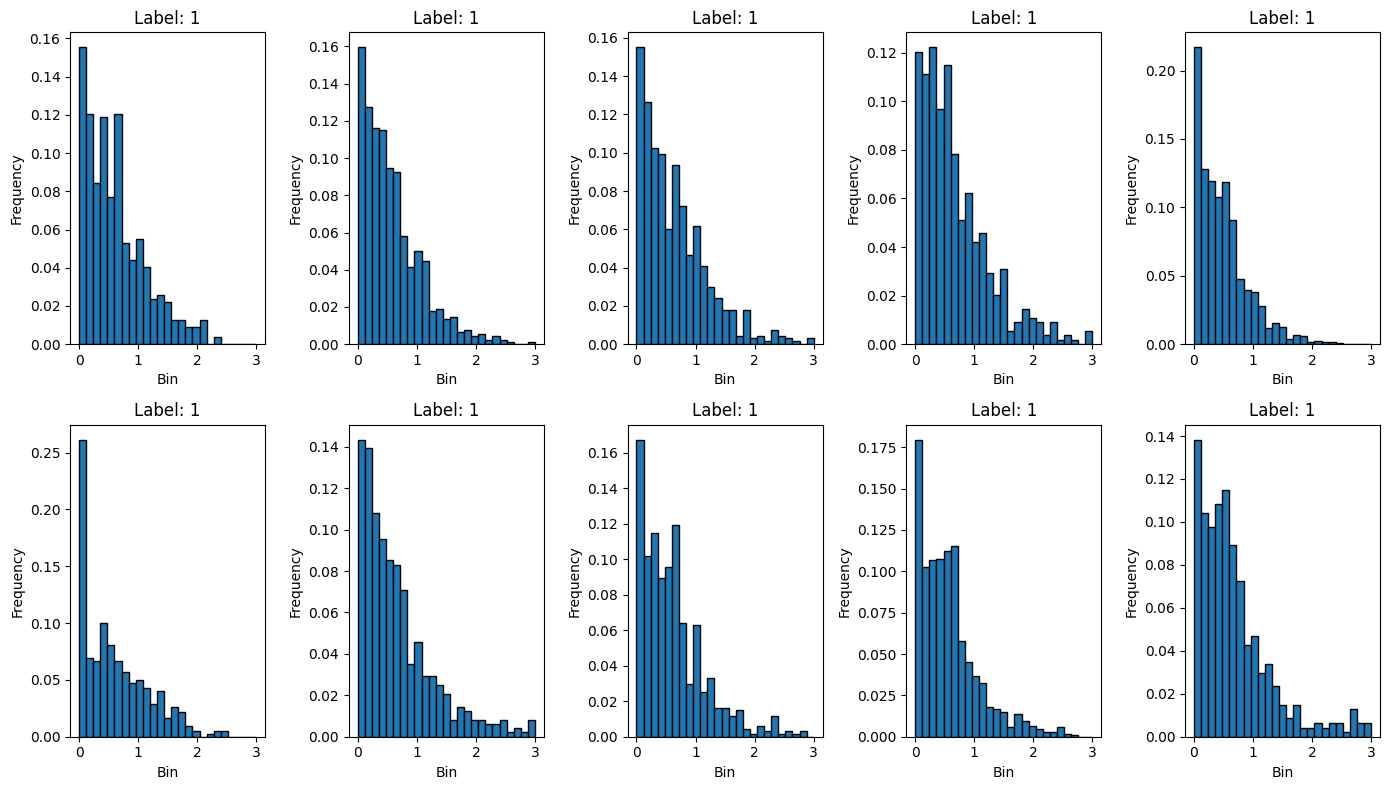

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import rankdata

# Load the dataset
data = np.load('hist.npz')
histograms = data['data']
labels = data['labels']
binspec = data['binspec']

# Function to visualize histograms
def plot_histograms(histograms, labels, binspec, num_to_plot=10):
    plt.figure(figsize=(14, 8))
    for i in range(num_to_plot):
        plt.subplot(2, num_to_plot // 2, i + 1)
        plt.bar(binspec[:-1], histograms[i], width=np.diff(binspec), edgecolor='black', align='edge')
        plt.title(f'Label: {labels[i]}')
        plt.xlabel('Bin')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Visualize the first 10 histograms with their labels
plot_histograms(histograms, labels, binspec)


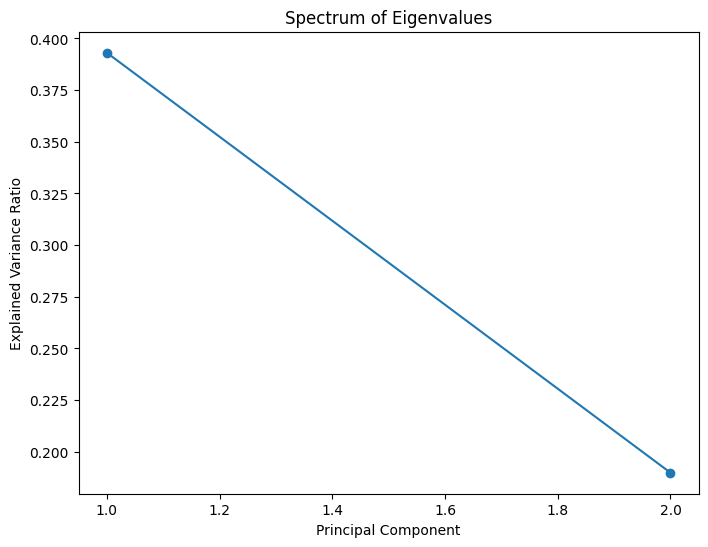

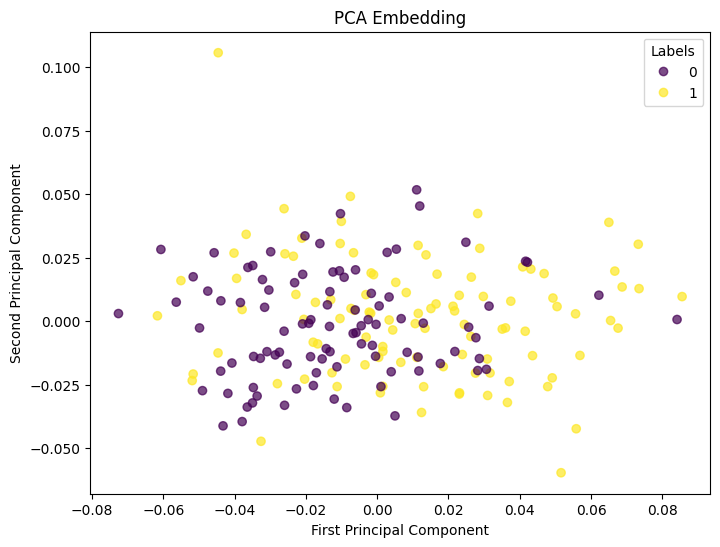

In [2]:
# Apply PCA
pca = PCA(n_components=2)
histograms_pca = pca.fit_transform(histograms)

# Plot the spectrum of eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Spectrum of Eigenvalues')
plt.show()

# Plot the PCA embedding
plt.figure(figsize=(8, 6))
scatter = plt.scatter(histograms_pca[:, 0], histograms_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Embedding')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()


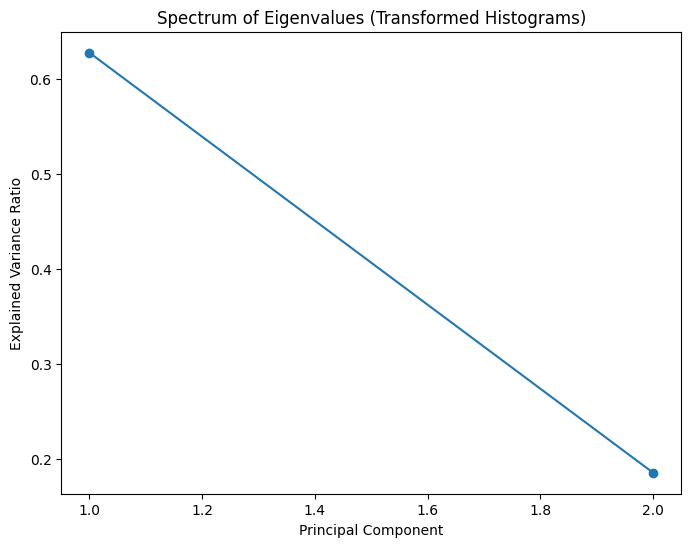

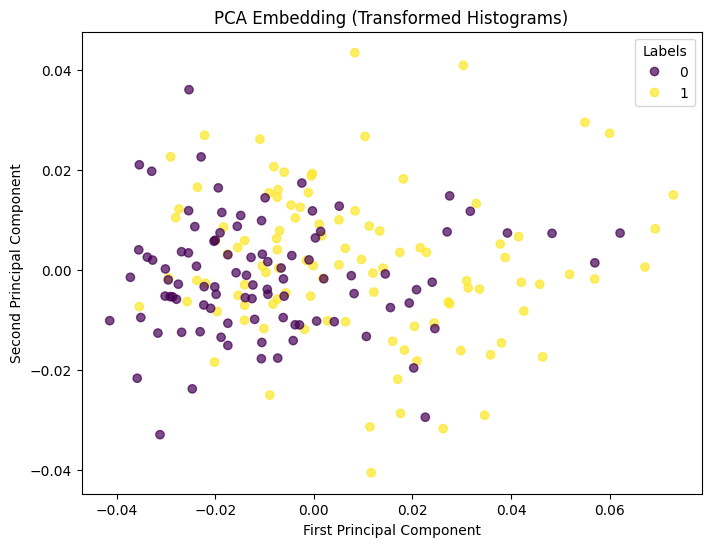

In [3]:
# Function to apply the inverse cumulative distribution transform
def inverse_cumulative_transform(histograms):
    transformed_histograms = np.zeros_like(histograms)
    for i, histogram in enumerate(histograms):
        cdf = np.cumsum(histogram)
        uniform_cdf = np.linspace(0, 1, len(histogram))
        transformed_histograms[i] = np.interp(cdf, uniform_cdf, histogram)
    return transformed_histograms

# Apply the inverse cumulative distribution transform
transformed_histograms = inverse_cumulative_transform(histograms)

# Apply PCA to the transformed histograms
pca_transformed = PCA(n_components=2)
transformed_histograms_pca = pca_transformed.fit_transform(transformed_histograms)

# Plot the spectrum of eigenvalues for the transformed histograms
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca_transformed.explained_variance_ratio_) + 1), pca_transformed.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Spectrum of Eigenvalues (Transformed Histograms)')
plt.show()

# Plot the PCA embedding for the transformed histograms
plt.figure(figsize=(8, 6))
scatter = plt.scatter(transformed_histograms_pca[:, 0], transformed_histograms_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Embedding (Transformed Histograms)')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()


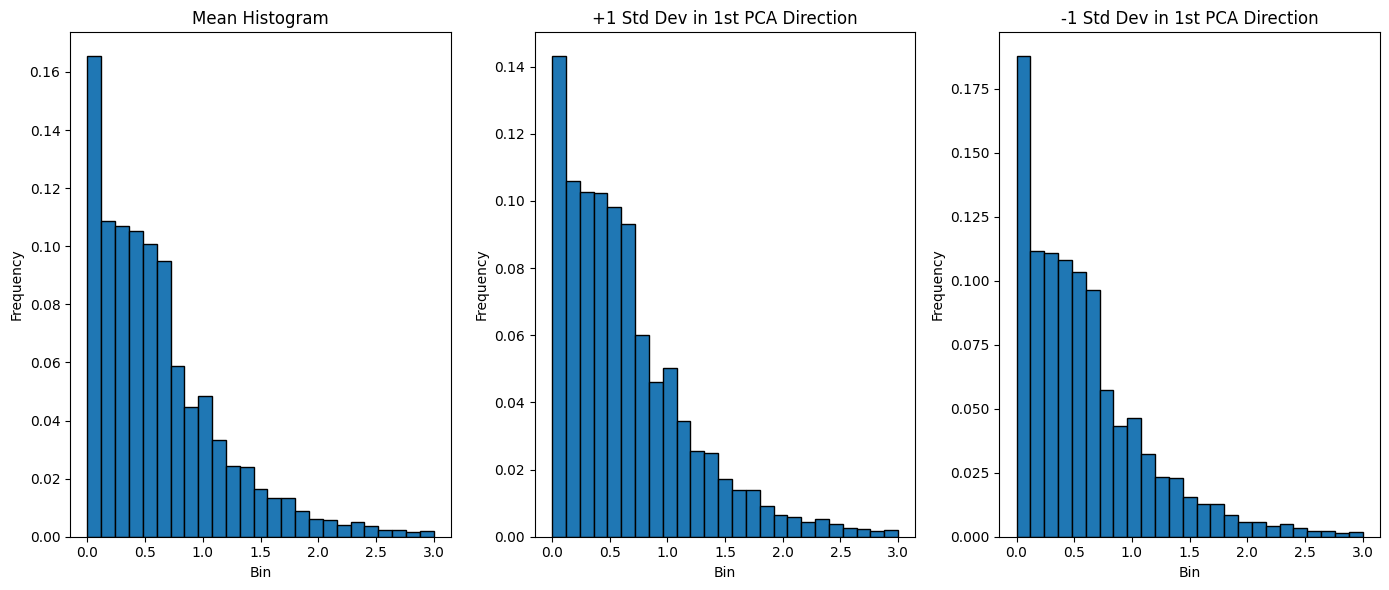

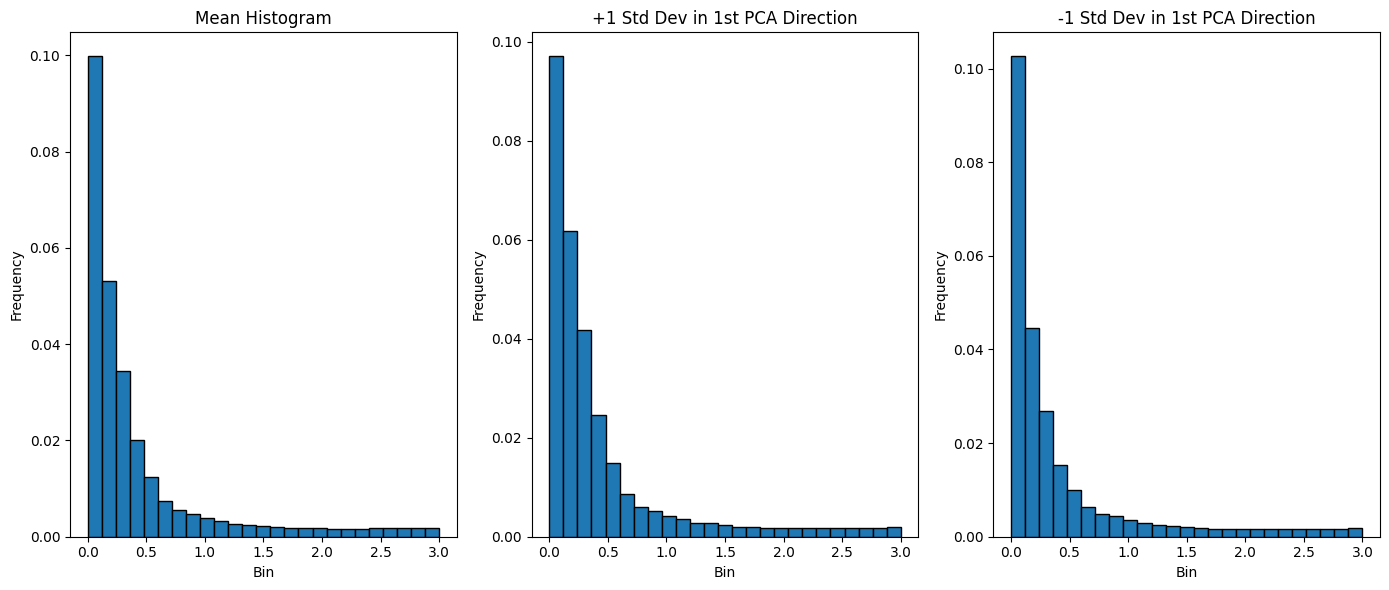

In [4]:
# Function to visualize changes along the first principal component
def plot_pca_direction_change(pca, histograms, binspec, labels, n_std=1):
    mean_histogram = np.mean(histograms, axis=0)
    first_component = pca.components_[0]
    std_dev = np.std(histograms, axis=0)
    
    plt.figure(figsize=(14, 6))

    # Original histogram
    plt.subplot(1, 3, 1)
    plt.bar(binspec[:-1], mean_histogram, width=np.diff(binspec), edgecolor='black', align='edge')
    plt.title('Mean Histogram')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    # Moving along +1 std in the first principal component direction
    plt.subplot(1, 3, 2)
    positive_change = mean_histogram + n_std * first_component * std_dev
    plt.bar(binspec[:-1], positive_change, width=np.diff(binspec), edgecolor='black', align='edge')
    plt.title('+1 Std Dev in 1st PCA Direction')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    # Moving along -1 std in the first principal component direction
    plt.subplot(1, 3, 3)
    negative_change = mean_histogram - n_std * first_component * std_dev
    plt.bar(binspec[:-1], negative_change, width=np.diff(binspec), edgecolor='black', align='edge')
    plt.title('-1 Std Dev in 1st PCA Direction')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Visualize changes for the original histograms
plot_pca_direction_change(pca, histograms, binspec, labels)

# Visualize changes for the transformed histograms
plot_pca_direction_change(pca_transformed, transformed_histograms, binspec, labels)


Description of Induced Changes in the Histograms

**1. Original Histograms:**
- **Mean Histogram:** The mean histogram represents the average distribution of the data across all bins. It provides a baseline for understanding the general shape and spread of the histograms in the dataset.
- **+1 Std Dev in 1st PCA Direction:** Moving along the first principal component by one standard deviation in the positive direction causes the histogram to shift and change its shape. This can indicate regions where there is significant variance in the dataset. For example, peaks in the histogram might become more pronounced or shift positions, and some bins may increase or decrease in frequency, highlighting areas of major variance.
- **-1 Std Dev in 1st PCA Direction:** Similarly, moving in the negative direction also changes the histogram but in the opposite manner. Peaks that increased in the positive direction might decrease here, and vice versa. This direction also captures significant variances but in the opposite sense.

**2. Transformed Histograms (After Inverse Cumulative Distribution Transform):**
- **Mean Histogram:** The mean histogram for the transformed data may appear more uniform or normalized due to the cumulative transform. It reflects the average shape after the transformation process, which can smooth out irregularities in the original data.
- **+1 Std Dev in 1st PCA Direction:** In the transformed space, moving along the first principal component by one standard deviation reveals how the cumulative distribution affects the variance. Changes may be more systematic and regular, showing how peaks and distributions adjust according to the transformed scale. The induced changes often reflect more regular and smooth adjustments compared to the original data.
- **-1 Std Dev in 1st PCA Direction:** Moving in the negative direction in the transformed space also shows systematic changes. The histogram might contract or redistribute in a more uniform manner, showing how the transform normalizes and redistributes variance across bins.
